# Plotting the Output Data From the Simulation Experiments

Plotting the results from the simulation of OLR hysteresis, in the cases of moisture and temperature being kept constant. 

### Import Packages

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

### Import Calculated Heights file from Simulation

In [2]:
path = "./Data/"

heights_mois_raw = xr.open_dataset(path + "heights_mois_case.nc")
heights_temp_raw = xr.open_dataset(path + "heights_temp_case.nc")
temp = xr.open_dataset(path + "temp.nc", decode_times=False)

lats = temp.lat.values
lons = temp.lon.values
lon_long = temp.lon.values

### Add Cyclic Points and Flip Data

In [3]:
heights_mois = np.zeros((len(lats), len(lons)))
heights_mois, lons = add_cyclic_point(
    heights_mois, coord=lons
)  # Otherwise a white line is plotted at lon = 0
lons = temp.lon.values

heights_temp = np.zeros((len(lats), len(lons)))
heights_temp, lon_long = add_cyclic_point(
    heights_temp, coord=lon_long
)  # lon_long has one extra term compared to lon

for i in range(len(lats)):
    for j in range(len(lons)):
        heights_mois[i, j] = heights_mois_raw.height.values[i, j]
        heights_temp[i, j] = heights_temp_raw.height.values[i, j]

heights_mois[:, len(lons)] = heights_mois[:, 0]  # Fill the newly created cyclic point
heights_temp[:, len(lons)] = heights_temp[:, 0]

heights_mois = np.flip(heights_mois, axis=0)
heights_temp = np.flip(heights_temp, axis=0)

### Plotting

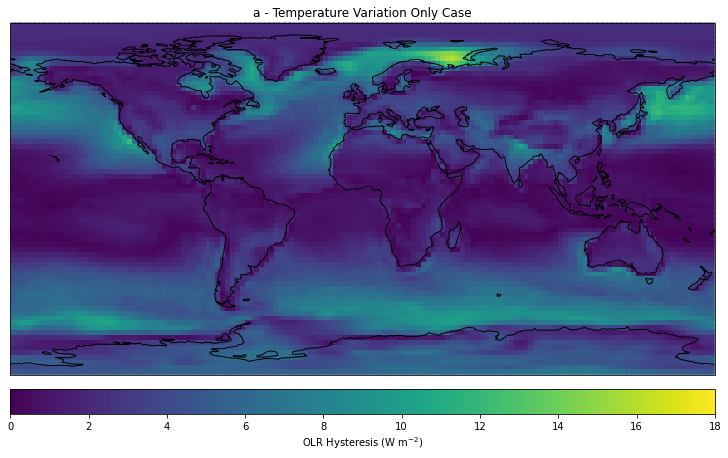

In [4]:
widths = [1]
fig = plt.figure(figsize=(10, 7), constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)

maxheight = 18

ax2 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(lon_long, lats, heights_temp, transform=ccrs.PlateCarree())
C2.set_clim(vmin=0, vmax=maxheight)
ax2.set_title("a - Temperature Variation Only Case")

fig.colorbar(
    C2,
    ax=ax2,
    label="OLR Hysteresis (W m$^{-2}$)",
    fraction=0.3,
    orientation="horizontal",
)

path = "./Figures/"
# plt.savefig(path + 'temperature case.png', bbox_inches='tight')

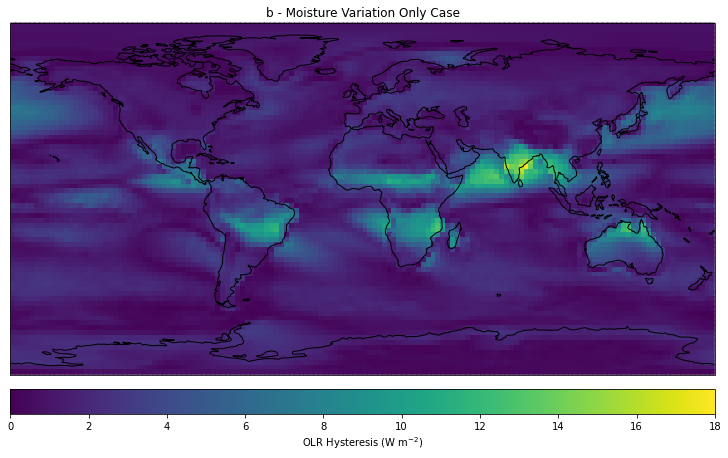

In [5]:
widths = [1]
fig = plt.figure(figsize=(10, 7), constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)

maxheight = 18

ax2 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(lon_long, lats, heights_mois, transform=ccrs.PlateCarree())
C2.set_clim(vmin=0, vmax=maxheight)
ax2.set_title("b - Moisture Variation Only Case")

fig.colorbar(
    C2,
    ax=ax2,
    label="OLR Hysteresis (W m$^{-2}$)",
    fraction=0.3,
    orientation="horizontal",
)

path = "./Figures/"
# plt.savefig(path + 'Moisture case.png', bbox_inches='tight')